# Getting opsim run and summary metric data

<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Getting opsim run and summary metric data</b> <br>
Contact authors: Eric Neilsen, Lynne Jones, Peter Yoachim<br>
Questions welcome at <a href="https://community.lsst.org/c/sci/survey-strategy">community.lsst.org/c/sci/survey-strategy</a> and the <a href="https://lsstc.slack.com/archives/C2LTWTP5J">#sims_operations</a> slack channel.<br>
Find additional MAF documentation and resources at <a href="https://rubin-sim.lsst.io">rubin-sim.lsst.io</a>. <br>

**Credit:** Stylistic elements of these notebooks were guided by the DP0.1 notebooks developed by Melissa Graham and the Rubin Observatory Community Engagement Team.

Note! This notebook was developed for evaluating the v2 simulations specifically. The content relating to comparing metrics with the archive plotting methods is still relevant, however we have not produced "family" json files for the newer v3 simulations. Summary data files for v3 are available however, in the relevant s3df download locations (such as https://s3df.slac.stanford.edu/data/rubin/sim-data/sims_featureScheduler_runs3.3/maf/summary.h5). 

## 1 Basic concepts

The Rubin Observatory Survey Strategy Team is producing an extensive collection of survey strategy simulations (using `opsim`) and corresponding analysis (using `MAF`). Many of these are of interest for science collaborations, and are publicly available. One interface to this data is [interactive web page](http://astro-lsst-01.astro.washington.edu:8080/) with lists of simulation runs and links ot `opsim` configuration and output files (databases of scheduled visits with simulated data quality) and output of `MAF` including summary values and plots:

- http://astro-lsst-01.astro.washington.edu:8080/
    
A programmatic interface to this data is also sometimes helpful. The `rubin_sim.maf.archive` module provides such an interface.

Survey strategy executions and analysis are assigned names and collected into groups for easy management and reference, according to the following nomenclature:

| term | discussion |
|------|------------|
| run | A **run** is a single execution of `opsim`. Each run produces an SQLite database of visits with data describing each visit (e.g. the start time, filter used, simulated seeing, etc.). Each `run` has a canonical "run name". Examples include `baseline_nexp2_v1.7.1_10yrs`, `baseline_v2.0_10yrs`, and `north_stripe_v2.0_10yrs`.|
| family | The survey strategy team often produces collections of runs designed to explore a specific aspect of survey strategy. Different runs in a collection vary the aspect of survey strategy being studied, while keeping other aspects the same. Comparing runs that are part of the same collection or **family** therefore supports exploring the effects of varying a specific parameter or other scheduler feature. Other collections for which direct comparison might be useful can also sometimes be grouped into the same family. Examples include the `baseline` family, which include simulations that have been used as "baselines" at different points in time; and `triplets`, which are runs that experimented with different methods of adding a third observation within a night. |
| summary metric | A **summary metric** is a single scalar representing some feature of an `opsim` run, generally one that indicates some aspect of the quality of the survey. Each `MAF` metric may produce any number of summary metrics, and each execution of MAF may construct an arbitrary number of summary metrics, depending on the MAF metric bundles executed. Each summary metric has a cannonical name derived from various elements of the metric bundle. |
| summary metric sets | Standard executions of MAF on opsim runs produce thousands of summary metrics, and users will only wish to inspect and compare limited subsets of these summary metrics at any given time. The survey strategy team has therefore pre-defined a collection of named sets of metrics, so that sets of metrics usefully examined as a group can be referenced together. Examples of summary metric sets include `SRD` (which correspond to requirement in the Science Requirements Document), `WFd Depths` (which describes the number of visits and typical depths in the WFD region), `TVS KNe` (summary metrics related to KNe relevant for the transients and variable stars working group), `DESC WFD` (summary metrics of interest to DESC analysis of the WFD survey), and more. | 

## 2 Notebook preparation

The following is a development style aid; only uncomment if developing the notebook:

In [1]:
#%load_ext nb_black
#%load_ext pycodestyle_magic
#%flake8_on --ignore E501,W505

Required imports:

In [2]:
from rubin_sim import maf
from rubin_sim.maf.run_comparison import archive

## 3 Run families

The "families" json file organizes `opsim` runs into "families," groups of runs that vary in a controlled way, and which are approprate for direct comparison with each other in order to understand the effects of varying specific parameters, or making specific alterations to survey strategy. Note that there are different versions of this file for v1 and v2 of the opsim outputs.

You can download a table of families, their descriptions, and definitions into a `pandas.DataFrame` thus:

In [3]:
families = maf.get_family_descriptions()
families

,description,version,reference,run,brief,filepath,url
family,,,,,,,
baseline,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,"[baseline_v3.0_10yrs, baseline_v2.2_10yrs, bas...",[V3 baseline simulation. This is the same as d...,"[fbs_3.0/baseline/baseline_v3.0_10yrs.db, fbs_...",[https://s3df.slac.stanford.edu/data/rubin/sim...
rolling,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,"[noroll_v2.0_10yrs, rolling_ns2_rw0.5_v2.0_10y...","[v2.0 baseline with no rolling, Rolling half-s...","[fbs_2.0/noroll/noroll_v2.0_10yrs.db, fbs_2.0/...",[https://s3df.slac.stanford.edu/data/rubin/sim...
rolling v2,**rolling v2** : This updates on the rolling f...,2.2,baseline_v2.2_10yrs,"[noroll_v2.2_10yrs, rolling_ns2_strength0.50v2...","[No rolling cadence, 2 band rolling cadence at...","[fbs_2.2/rolling/noroll_v2.2_10yrs.db, fbs_2.2...",[https://s3df.slac.stanford.edu/data/rubin/sim...
triplets,**triplets** : These simulations add a third v...,2.0,baseline_v2.0_10yrs,"[presto_gap1.5_v2.0_10yrs, presto_gap2.0_v2.0_...","[Triples spaced 1.5 hours apart g+r,r+i,i+z in...","[fbs_2.0/presto/presto_gap1.5_v2.0_10yrs.db, f...",[https://s3df.slac.stanford.edu/data/rubin/sim...
long gaps no pairs,**long gaps no pairs** : The baseline survey s...,2.0,baseline_v2.0_10yrs,[long_gaps_np_nightsoff7_delayed1827_v2.0_10yr...,[Long gaps pairs every 7 nights starting after...,[fbs_2.0/long_gaps_nopair/long_gaps_np_nightso...,[https://s3df.slac.stanford.edu/data/rubin/sim...
bluer balance,**bluer balance** : The standard filter balanc...,2.0,baseline_v2.0_10yrs,"[bluer_indx0_v2.0_10yrs, bluer_indx1_v2.0_10yrs]","[More g - filter ratio in WFD of {'u': 0.07, '...","[fbs_2.0/bluer/bluer_indx0_v2.0_10yrs.db, fbs_...",[https://s3df.slac.stanford.edu/data/rubin/sim...
longer u visits,**longer u visits** : The baseline survey uses...,2.0,baseline_v2.0_10yrs,"[long_u1_v2.0_10yrs, long_u2_v2.0_10yrs]","[u band visits 1x50s, number of u visits same ...","[fbs_2.0/long_u/long_u1_v2.0_10yrs.db, fbs_2.0...",[https://s3df.slac.stanford.edu/data/rubin/sim...
vary nes,**vary nes** : These simulations investigate t...,2.0,baseline_v2.0_10yrs,"[vary_nes_nesfrac0.01_v2.0_10yrs, vary_nes_nes...","[NES at 1% WFD level, NES at 5% WFD level, NES...",[fbs_2.0/vary_nes/vary_nes_nesfrac0.01_v2.0_10...,[https://s3df.slac.stanford.edu/data/rubin/sim...
vary gp,**vary gp** : These simulations investigate th...,2.0,baseline_v2.0_10yrs,"[vary_gp_gpfrac0.01_v2.0_10yrs, vary_gp_gpfrac...","[Dusty plane at 1% WFD level, Dusty plane at 5...",[fbs_2.0/vary_gp/vary_gp_gpfrac0.01_v2.0_10yrs...,[https://s3df.slac.stanford.edu/data/rubin/sim...


By default, `get_family_descriptions` retrives the runs data from a json file at the URL provided in `archive.FAMILY_SOURCE`:

In [4]:
archive.FAMILY_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.2.json'

If you wish to load runs from an alternate source, it can be specified with the `family_source` argument to `get_family_descriptions`.

You can use the loaded data to get a list of available families:

You can get more pleasantly formatted descriptions of the families using `archive.describe_families`:

In [5]:
maf.describe_families(families.loc[["baseline", "technical"]])

---
**baseline** : The v2-v3 baseline simulations. V2.0 and V2.1 feature a survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. The v2.1 simulation adds coverage in the Virgo cluster and acquisition of good seeing images in r&i bands. The retro simulations are intended to provide a bridge from v1.X to v2.X, introducing modifications to the footprint and scheduler code separately and in stages. v3 changes the GP footprint, adds more time in the DDFs (7%) and adds a near-sun twilight microsurvey, as well as adding third visits per night every 7 nights.  
**version**: --  
**runs**:  


,brief,filepath
run,,
baseline_v3.0_10yrs,"V3 baseline simulation. This is the same as draft2_rw0.9_uz_v2.99_10yrs, which was adopted as the baseline simulation in the SCOC Phase 2 deliberations (see PSTN-055). It includes a two-region rolling cadence with weight 0.9, a connected galactic plane region, the DDFs at 7% of survey time, and a full strength near-sun twilight microsurvey. Filters swap between u/z during dark/bright time.",fbs_3.0/baseline/baseline_v3.0_10yrs.db
baseline_v2.2_10yrs,v2.2 baseline (prescheduled DDFs),fbs_2.2/baseline/baseline_v2.2_10yrs.db
baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline_v2.0_10yrs,v2.0 baseline,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code capabilities),fbs_2.0/retro/retro_baseline_v2.0_10yrs.db


---
**technical** : This family is primarily aimed at questions arising in the course of the project team work, but one simulation seemed interesting to make available to the community. This is the `march_start_v2.1_10yrs` run, which simulates a March 2023 start to the survey. This is impractical, but could serve as a useful off-season comparison to the baseline, which starts in October 2024.   
**version**: 2.1  
**runs**:  


,brief,filepath
run,,
march_start_v2.1_10yrs,Start the survey in March 2022,fbs_2.1/technical/march_start/march_start_v2.1_10yrs.db


(None, None)

## 4 Getting a table of runs

You can download a `pandas.DataFrame` of runs with basic information on each run using `get_runs`:

In [6]:
runs = maf.get_runs()
runs

,family,version,brief,filepath,url
run,,,,,
baseline_retrofoot_v2.0_10yrs,[baseline],[--],v1.x footprint but new code capabilities,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
baseline_v2.0_10yrs,[baseline],[--],v2.0 baseline,fbs_2.0/baseline/baseline_v2.0_10yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
baseline_v2.1_10yrs,[baseline],[--],"v2.1 baseline (+Virgo, good seeing)",fbs_2.1/baseline/baseline_v2.1_10yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
baseline_v2.2_10yrs,[baseline],[--],v2.2 baseline (prescheduled DDFs),fbs_2.2/baseline/baseline_v2.2_10yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
baseline_v2.2_2yrs,[ToO],[2.2],v2.2 baseline first two years only,fbs_2.2/baseline/baseline_v2.2_2yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,[vary nes],[2.0],NES at 50% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.50_v2.0_10y...,https://s3df.slac.stanford.edu/data/rubin/sim-...
vary_nes_nesfrac0.55_v2.0_10yrs,[vary nes],[2.0],NES at 55% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.55_v2.0_10y...,https://s3df.slac.stanford.edu/data/rubin/sim-...
vary_nes_nesfrac0.75_v2.0_10yrs,[vary nes],[2.0],NES at 75% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.75_v2.0_10y...,https://s3df.slac.stanford.edu/data/rubin/sim-...


By default, `get_runs` retrives the runs data from the same json file as `archive.get_family_descriptions`, and also has an argument to download the data from a different source.

`get_family_descriptions` and `get_runs` load the same data, but the former is indexed by families, with one row per family; and the later by runs, with one row per run. In the former case, values that vary by run for the same family have list values, while in the later case values that vary by family for the same run have list values.

If you want a `DataFrame` with one row per run/family combination, such that there are no columns with list-valued cells, you can `explode` the `pandas.DataFrame` returned by `get_runs` (or `get_family_descriptions`) and set the `family` column to be the index, or use the `get_family_runs` shorthand:

In [7]:
family_runs = maf.get_family_runs()
family_runs

,run,description,version,reference,brief,url,filepath
family,,,,,,,
baseline,baseline_v3.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,V3 baseline simulation. This is the same as dr...,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_3.0/baseline/baseline_v3.0_10yrs.db
baseline,baseline_v2.2_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v2.2 baseline (prescheduled DDFs),https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.2/baseline/baseline_v2.2_10yrs.db
baseline,baseline_v2.1_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline,baseline_v2.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v2.0 baseline,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline,baseline_retrofoot_v2.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v1.x footprint but new code capabilities,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
...,...,...,...,...,...,...,...
draft v3,more_z_v2.99_10yrs,**draft v3** : Draft versions of simulations i...,2.99,baseline_v2.2_10yrs,Like draft_connected but swap u/z/y instead of...,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_3.0/more_z/more_z_v2.99_10yrs.db
draft v3,light_roll_v2.99_10yrs,**draft v3** : Draft versions of simulations i...,2.99,baseline_v2.2_10yrs,Draft_connected footprint but full strength ne...,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_3.0/light_roll/light_roll_v2.99_10yrs.db
draft v3,draft2_rw0.5_v2.99_10yrs,**draft v3** : Draft versions of simulations i...,2.99,baseline_v2.2_10yrs,"Draft connected footprint, rolling weight 0.5,...",https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_3.0/draft2/draft2_rw0.5_v2.99_10yrs.db


This makes it easy to reference just the runs from a family (or set of families) of interest.

`get_family_runs` reads the run metadata from the same source as `get_runs`, and (like `get_runs`) alternate sources can be specified by an argument.

First, let's look at a list of all families, and how many runs are in each:

In [8]:
family_runs.groupby("family").agg({"run": "count"})

,run
family,
ToO,49
baseline,6
bluer balance,2
clouds baseline,20
ddf accordian,39
ddf accordian v2,39
ddf bright,6
ddf custom v2,1
ddf desc,2


If I want to work with just runs in `baseline` or `rolling`, I can build `pandas.DataFrame` of such runs by slicing `family_runs`:

In [9]:
my_runs = family_runs.loc[["baseline", "rolling"]]
my_runs

,run,description,version,reference,brief,url,filepath
family,,,,,,,
baseline,baseline_v3.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,V3 baseline simulation. This is the same as dr...,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_3.0/baseline/baseline_v3.0_10yrs.db
baseline,baseline_v2.2_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v2.2 baseline (prescheduled DDFs),https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.2/baseline/baseline_v2.2_10yrs.db
baseline,baseline_v2.1_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline,baseline_v2.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v2.0 baseline,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline,baseline_retrofoot_v2.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v1.x footprint but new code capabilities,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
baseline,retro_baseline_v2.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v1.x baseline with rubin_sim (without new code...,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/retro/retro_baseline_v2.0_10yrs.db
rolling,noroll_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,v2.0 baseline with no rolling,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/noroll/noroll_v2.0_10yrs.db
rolling,rolling_ns2_rw0.5_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,Rolling half-sky (2 regions) 50%,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/rolling/rolling_ns2_rw0.5_v2.0_10yrs.db
rolling,rolling_ns3_rw0.5_v2.0_10yrs,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,Rolling third-sky (3 regions) 50%,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/rolling/rolling_ns3_rw0.5_v2.0_10yrs.db


## 5 Getting summary metrics on runs

`get_metric_summaries` will retrieve the "summary" results of MAF for these runs into a `pandas.DataFrame`. By default, summary data is downloaded from the URL specified by `archive.DEFAULT_SUMMARY_SOURCE`. Users may pass an alternate source (URL or file name) to `get_metric_summaries` to load the data from elsewhere.
Note that there may be multiple versions of this summary file available; using the latest version is generally the best choice. 

In [10]:
archive.SUMMARY_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2023_01_01.csv'

In general, it's worthwhile to download the entire summary file once and subset it later:

In [11]:
summaries = maf.get_metric_summaries()

But, it is also possible to get only metrics on runs in a single (or a few) families by supplying arguments to specify which runs, run families, and metrics you want.  (note that this downloads the entire dataframe and then only returns the subset -- if doing this frequently, just download it once). 

In [12]:
maf.get_metric_summaries(run_families=["rolling", "baseline"])

metric,fOArea fO HealpixSlicer,fOArea/benchmark fO HealpixSlicer,fONv MedianNvis fO HealpixSlicer,fONv MinNvis fO HealpixSlicer,fONv/benchmark MedianNvis fO HealpixSlicer,fONv/benchmark MinNvis fO HealpixSlicer,fOArea_750 fO HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @ 22.4 HealpixSlicer,Area better than 11.5 mas uncertainty Parallax Uncert @ 22.4 HealpixSlicer,95th Percentile Parallax Uncert Parallax Uncert @ 22.4 HealpixSlicer,...,Nobj <= 22.0 DifferentialCompleteness PHA 3 triplets in 30 nights detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 3 pairs in 15 nights SNR=5 detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA Single pair detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 4 pairs in 20 nights detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 3 pairs in 30 nights detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 3 pairs in 15 nights SNR=0 detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA High velocity pair detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness NEO 1 quad in 1 night detection loss MoObjSlicer,Nobj <= 25.0 DifferentialCompleteness NEO 1 quad in 1 night detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness PHA 1 quad in 1 night detection loss MoObjSlicer
run,,,,,,,,,,,,,,,,,,,,,
noroll_v2.0_10yrs,12558.350813,0.697686,837.0,788.0,1.014545,0.955152,18606.300821,2.382212,27194.792692,10.156088,...,1245.140472,2210.181964,2868.146649,1859.519907,2381.668857,3415.129300,1294.976080,NaN,NaN,NaN
rolling_ns2_rw0.5_v2.0_10yrs,12614.583488,0.700810,838.0,787.0,1.015758,0.953939,18602.104352,2.378763,27235.918081,10.093170,...,1279.340044,2194.840751,2863.386010,1862.859693,2359.399387,3423.176949,1276.972518,NaN,NaN,NaN
rolling_ns3_rw0.5_v2.0_10yrs,12729.566717,0.707198,838.0,788.0,1.015758,0.955152,18609.657995,2.407053,27211.578565,10.245571,...,1294.302380,2179.619286,2862.121890,1848.823122,2346.106489,3417.324114,1292.491261,NaN,NaN,NaN
rolling_ns2_rw0.9_v2.0_10yrs,12893.228978,0.716290,839.0,787.0,1.016970,0.953939,18620.568813,2.423048,27299.704398,10.034633,...,1312.293704,2190.416091,2862.547417,1863.178987,2331.147210,3440.003850,1259.009614,NaN,NaN,NaN
rolling_ns3_rw0.9_v2.0_10yrs,13255.803832,0.736434,841.0,788.0,1.019394,0.955152,18616.372344,2.463206,27336.633318,9.876820,...,1373.446162,2162.578494,2848.698573,1840.641986,2308.109122,3457.562355,1242.193884,NaN,NaN,NaN
rolling_bulge_ns2_rw0.5_v2.0_10yrs,12600.315496,0.700018,838.0,787.0,1.015758,0.953939,18597.068591,2.382731,27248.507485,10.064200,...,1278.385933,2211.408898,2868.543139,1862.744200,2368.370689,3426.103366,1274.286464,NaN,NaN,NaN
rolling_bulge_ns2_rw0.8_v2.0_10yrs,12733.763185,0.707431,838.0,787.0,1.015758,0.953939,18615.533051,2.401465,27193.114105,10.401435,...,1327.464061,2184.954747,2865.069955,1869.389237,2332.758984,3438.540641,1277.806565,NaN,NaN,NaN
rolling_bulge_ns2_rw0.9_v2.0_10yrs,12940.229422,0.718902,840.0,787.0,1.018182,0.953939,18627.283162,2.430182,27253.543247,10.158981,...,1341.848211,2188.762712,2857.769841,1863.452320,2340.967291,3449.514707,1257.905909,NaN,NaN,NaN
rolling_all_sky_ns2_rw0.9_v2.0_10yrs,12900.782621,0.716710,839.0,787.0,1.016970,0.953939,18619.729519,2.408543,27199.828454,10.335857,...,1335.738251,2193.381026,2857.843014,1865.574858,2343.120948,3435.614223,1250.437349,NaN,NaN,NaN


It returned more than 10000 metrics for these runs, which is more than necessary or convenient for most purposes (but are provided in order to allow for individual exploration).  The next section highlights some aids to that exploration. 

## 6 Metric sets

Rather than sort through all these metrics, you can work with pre-defined sets of metrics generated for a variety of purposes. `get_metric_sets` loads definitions of sets of metrics (and other metric metadata) from a URL specified by `archive.DEFAULT_METRIC_SET_SOURCE`. Users can load this data by passing the URL or file name as the argument to `get_metric_sets`. *Metric set definitions cannot be arbitrarily mixed with summary sources: each version of summary source must be matched with a corresponding metric set source.*

In [13]:
archive.METRIC_SET_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'

You can get the set definitions using `get_metric_sets`:
(again, this can be helpful to download once)

In [14]:
metric_sets = maf.get_metric_sets()
metric_sets

metric  \
metric set metric                                                                                                  
radar      fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
           Total detected SNNSNMetric_nSN  HealpixSlicer           Total detected SNNSNMetric_nSN  HealpixSlicer   
           Total detected KNePopMetric_single__ztfrest_sim...  Total detected KNePopMetric_single__ztfrest_si...   
           Total detected MicrolensingMetric_detect tE 20_...  Total detected MicrolensingMetric_detect tE 20...   
...                                                                                                          ...   
SL IQ      Median Min seeingEff Yr 1 g band HealpixSlicer         Median Min seeingEff Yr 1 g band HealpixSlicer   
           Median Min seeingEff All sky r band HealpixSlicer   Median Min seeingEff All sky r band HealpixSlicer   
           Median Min seeingEff Yr 1 r band HealpixSlicer         Median Min seeingEff Yr 1 r band HealpixSlicer   
           Median Min seeingEff All sky i band HealpixSlicer   Median Min seeingEff All sky i band HealpixSlicer   
           Median Min seeingEff Yr 1 i band HealpixSlicer         Median Min seeingEff Yr 1 i band HealpixSlicer   

                                                                                  short_name  \
metric set metric                                                                              
radar      fONv MedianNvis fO All sky HealpixSlicer                                 fONv_med   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...                      3x2pt FoM   
           Total detected SNNSNMetric_nSN  HealpixSlicer                                SNIa   
           Total detected KNePopMetric_single__ztfrest_sim...      KNe single ztfrest_simple   
           Total detected MicrolensingMetric_detect tE 20_...      Microlensing (20_30 days)   
...                                                                                      ...   
SL IQ      Median Min seeingEff Yr 1 g band HealpixSlicer      Med Min seeingEff g band Yr 1   
           Median Min seeingEff All sky r band HealpixSlicer        Med Min seeingEff r band   
           Median Min seeingEff Yr 1 r band HealpixSlicer      Med Min seeingEff r band Yr 1   
           Median Min seeingEff All sky i band HealpixSlicer        Med Min seeingEff i band   
           Median Min seeingEff Yr 1 i band HealpixSlicer      Med Min seeingEff i band Yr 1   

                                                              style  invert  \
metric set metric                                                             
radar      fONv MedianNvis fO All sky HealpixSlicer            None   False   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  None   False   
           Total detected SNNSNMetric_nSN  HealpixSlicer       None   False   
           Total detected KNePopMetric_single__ztfrest_sim...  None   False   
           Total detected MicrolensingMetric_detect tE 20_...  None   False   
...                                                             ...     ...   
SL IQ      Median Min seeingEff Yr 1 g band HealpixSlicer        g:    True   
           Median Min seeingEff All sky r band HealpixSlicer     r-    True   
           Median Min seeingEff Yr 1 r band HealpixSlicer        r:    True   
           Median Min seeingEff All sky i band HealpixSlicer     b-    True   
           Median Min seeingEff Yr 1 i band HealpixSlicer        b:    True   

                                                                 mag  
metric set metric                                                     
radar      fONv MedianNvis fO All sky HealpixSlicer            False  
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  False  
           Total detected SNNSNMetri

You can see what 'groups' of metrics have already been defined.

In [15]:
list(metric_sets.groupby("metric set").first().index)

['AGN N QSO',
 'AGN SF',
 'AGN SF DDF',
 'AGN TimeLag 100 days DDF',
 'AGN TimeLag 5 days DDF',
 'AGN short',
 'AGN timelag',
 'DDF Cadence',
 'DDF Depths',
 'DESC WFD',
 'GP filters',
 'GP footprint',
 'GP season',
 'GP visit',
 'N Visits',
 'SCOC',
 'SL IQ',
 'SL TDC',
 'SNIa DDF',
 'SNSL DDF',
 'SRD',
 'SSO N Objs',
 'SSO discovery',
 'SSO discovery options',
 'SSO fraction 3 bands',
 'SSO fraction 4 bands',
 'SSO fraction 5 bands',
 'SSO fraction 6 bands',
 'SSO lightcurve inversion',
 'Stars',
 'TVS KNe',
 'TVS KNe short',
 'TVS PeriodModulation',
 'TVS PeriodicDetect',
 'TVS Presto',
 'TVS TDE',
 'TVS Tgaps',
 'TVS XRB',
 'TVS anomalies',
 'TVS microlensing all',
 'TVS microlensing short',
 'TVS short',
 'WFD Depths',
 'cadence',
 'galaxies',
 'plot areas',
 'radar',
 'short description']

Slicing this `pandas.DataFrame` will give you the metrics for just the sets you specify:

In [16]:
metric_sets.loc["SRD"]

,metric,short_name,style,invert,mag
metric,,,,,
fONv MedianNvis fO All sky HealpixSlicer,fONv MedianNvis fO All sky HealpixSlicer,fONv MedianNvis,k-,False,False
Median Parallax Uncert (18k) Parallax Uncert @ 22.4 All sky HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @...,Med Parallax Uncert @22.4,c-,True,False
Median Parallax Uncert (18k) Parallax Uncert @ 24.0 All sky HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @...,Med Parallax Uncert @24.0,c:,True,False
Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 All sky HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motio...,Med PM Uncert @20.5,r-,True,False
Median Proper Motion Uncert (18k) Proper Motion Uncert @ 24.0 All sky HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motio...,Med PM Uncert @24.0,r:,True,False


In [17]:
metric_sets.loc[["SRD", "SCOC"], :]

metric  \
metric set metric                                                                                                  
SRD        fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
           Median Parallax Uncert (18k) Parallax Uncert @ ...  Median Parallax Uncert (18k) Parallax Uncert @...   
           Median Parallax Uncert (18k) Parallax Uncert @ ...  Median Parallax Uncert (18k) Parallax Uncert @...   
           Median Proper Motion Uncert (18k) Proper Motion...  Median Proper Motion Uncert (18k) Proper Motio...   
           Median Proper Motion Uncert (18k) Proper Motion...  Median Proper Motion Uncert (18k) Proper Motio...   
SCOC       fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
           Median Parallax Uncert (18k) Parallax Uncert @ ...  Median Parallax Uncert (18k) Parallax Uncert @...   
           Median Proper Motion Uncert (18k) Proper Motion...  Median Proper Motion Uncert (18k) Proper Motio...   
           Mean WeakLensingNvisits gri band non-DD Healpix...  Mean WeakLensingNvisits gri band non-DD Healpi...   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
           Total detected SNNSNMetric_nSN  HealpixSlicer           Total detected SNNSNMetric_nSN  HealpixSlicer   
           Total detected KNePopMetric_all__multi_color_de...  Total detected KNePopMetric_all__multi_color_d...   
           Total detected KNePopMetric_single__ztfrest_sim...  Total detected KNePopMetric_single__ztfrest_si...   
           Total detected XRBPopMetric__early_detect  User...  Total detected XRBPopMetric__early_detect  Use...   
           Total detected MicrolensingMetric_detect tE 20_...  Total detected MicrolensingMetric_detect tE 20...   
           Median TDC_Rate  HealpixSlicer                                         Median TDC_Rate  HealpixSlicer   
           Total N Stars, crowding N stars to Precision 0....  Total N Stars, crowding N stars to Precision 0...   
           VolumeSum Brown Dwarf, L4  HealpixSlicer                     VolumeSum Brown Dwarf, L4  HealpixSlicer   
           Sum young_stars  HealpixSlicer                                         Sum young_stars  HealpixSlicer   
           N Galaxies (all) DepthLimitedNumGalaxiesMetric ...  N Galaxies (all) DepthLimitedNumGalaxiesMetric...   
           Area M_v>-6.4 LVDwarfs gi HealpixSlicer                       Area M_v>-6.4 LVDwarfs gi HealpixSlicer   
           Area M_v>0.0 LVDwarfs gi SCP HealpixSlicer                 Area M_v>0.0 LVDwarfs gi SCP HealpixSlicer   
           3 pairs in 15 nights detection loss NEO H<=16.0       3 pairs in 15 nights detection loss NEO H<=16.0   
           3 pairs in 15 nights detection loss NEO H<=22.0       3 pairs in 15 nights detection loss NEO H<=22.0   
           3 pairs in 15 nights detection loss TNO H<=6.0         3 pairs in 15 nights detection loss TNO H<=6.0   
           FractionPop Lightcurve Inversion MBA H=18.0               FractionPop Lightcurve Inversion MBA H=18.0   

                                                                                     short_name  \
metric set metric                                                                                 
SRD        fONv MedianNvis fO All sky HealpixSlicer                             fONv MedianNvis   
           Median Parallax Uncert (18k) Parallax Uncert @ ...         Med Parallax Uncert @22.4   
           Median Parallax Uncert (18k) Parallax Uncert @ ...         Med Parallax Uncert @24.0   
           Median Proper Motion Uncert (18k) Proper Motion...               Med PM Uncert @20.5   
           Median Proper Motion Uncert (18k) Proper Motion...               Med PM Uncert @24.0   
SCOC       fONv MedianNvis fO All sky HealpixSlicer                                    fONv_med   
           Median Parallax Uncert (18k) Parallax Uncert @ ...    

Writing new metric sets is extremely reasonable -- and there are some functions in the `archive` module to help make this easier (see `create_metric_set_df` and `write_metric_sets`). 

You can get metric summaries by getting the list of metrics from the `DataFrame` through the `metrics` option, or you can just set the `metric_sets` option directly:

In [18]:
maf.get_metric_summaries(
    summary_source=summaries, run_families="rolling", metric_sets="SCOC"
)

metric,Median Parallax Uncert (18k) Parallax Uncert @ 22.4 HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 HealpixSlicer,"VolumeSum Brown Dwarf, L4 HealpixSlicer",Sum young_stars HealpixSlicer,Total detected MicrolensingMetric_detect tE 20_30 days UserPointsSlicer,Total detected SNNSNMetric_nSN HealpixSlicer,Median TDC_Rate HealpixSlicer,Total detected KNePopMetric_single__ztfrest_simple single model UserPointsSlicer,Total detected KNePopMetric_all__multi_color_detect all models UserPointsSlicer,Total detected XRBPopMetric__early_detect UserPointsSlicer,...,"Total N Stars, crowding N stars to Precision 0.20 r HealpixSlicer",Area M_v>-6.4 LVDwarfs gi HealpixSlicer,Area M_v>0.0 LVDwarfs gi SCP HealpixSlicer,N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,Mean WeakLensingNvisits gri band non-DD HealpixSlicer,fONv MedianNvis fO All sky HealpixSlicer,3 pairs in 15 nights detection loss NEO H<=16.0,3 pairs in 15 nights detection loss NEO H<=22.0,3 pairs in 15 nights detection loss TNO H<=6.0,FractionPop Lightcurve Inversion MBA H=18.0
run,,,,,,,,,,,,,,,,,,,,,
noroll_v2.0_10yrs,2.382212,0.189097,596557.218705,8.106890e+06,3154.0,99825.867625,25.383384,390.0,2047.0,1917.0,...,2.674689e+09,14163.919557,1577.872053,4.653054e+09,440.737094,837.0,0.9254,0.580079,0.694019,0.157832
rolling_ns2_rw0.5_v2.0_10yrs,2.378763,0.189703,588168.020635,8.070237e+06,3163.0,97564.333258,24.191814,420.0,1996.0,1902.0,...,2.603593e+09,13972.560605,1614.800973,4.596822e+09,440.826126,838.0,0.9282,0.574481,0.694734,0.154831
rolling_ns3_rw0.5_v2.0_10yrs,2.407053,0.190241,586101.697058,8.034623e+06,3062.0,94166.278233,23.348476,395.0,1941.0,1866.0,...,2.632119e+09,14012.846700,1524.157260,4.613393e+09,441.431158,838.0,0.9292,0.578934,0.696531,0.146429
rolling_ns2_rw0.9_v2.0_10yrs,2.423048,0.190588,579945.237222,8.080644e+06,3116.0,99313.310364,21.566539,464.0,1938.0,1879.0,...,2.610228e+09,14073.275843,1554.371831,4.568638e+09,442.290894,839.0,0.9296,0.575235,0.695976,0.149230
rolling_ns3_rw0.9_v2.0_10yrs,2.463206,0.193339,574126.749843,8.005156e+06,3058.0,95460.875620,19.682864,513.0,1727.0,1851.0,...,2.619599e+09,13482.413117,1567.800529,4.525135e+09,442.823768,841.0,0.9324,0.566985,0.697595,0.138828
rolling_bulge_ns2_rw0.5_v2.0_10yrs,2.382731,0.189862,591012.960090,8.087305e+06,2986.0,96297.018624,24.084557,395.0,2028.0,1860.0,...,2.662966e+09,13855.059495,1581.229228,4.614111e+09,440.861784,838.0,0.9272,0.578730,0.694457,0.154831
rolling_bulge_ns2_rw0.8_v2.0_10yrs,2.401465,0.190302,583307.266081,8.022447e+06,2929.0,98525.710353,22.306281,450.0,1965.0,1750.0,...,2.651507e+09,13750.987083,1581.229228,4.555702e+09,441.304357,838.0,0.9312,0.575349,0.696074,0.151030
rolling_bulge_ns2_rw0.9_v2.0_10yrs,2.430182,0.190882,579141.972754,7.990022e+06,2957.0,98596.482291,21.552229,441.0,1950.0,1749.0,...,2.618720e+09,13720.772512,1598.015100,4.566399e+09,441.817383,840.0,0.9318,0.574934,0.695751,0.148230
rolling_all_sky_ns2_rw0.9_v2.0_10yrs,2.408543,0.190704,579818.790285,8.014170e+06,2950.0,98764.808726,21.543055,451.0,1944.0,1750.0,...,2.642737e+09,13824.844924,1571.157704,4.537842e+09,441.812266,839.0,0.9332,0.574310,0.695887,0.148030


## 7 Normalizing summary metrics

When comparing many runs with many metrics, it helps if each metric behaves similarly. As recorded, though, the numeric values of different metrics mean different things. For example, some metrics are better when they have higher values, others are better with lower values. Furthermore, they are all scaled differently.

For ease of comparison, we can transform all of them such that they take a value of 1 if they are equally good to some baseline, positive if better, negative if worse.

This comparison continues to be rough: different metrics continue to have different units, and so are not directly comparable. Still, it is a rough improvement.

Pick a family of runs and a set of metrics to use in this example:

In [19]:
this_family = ["baseline", "rolling"]
this_metric_set = "SRD"

We need to pick a reference run to define to have a normalized value of 1:

In [20]:
baseline_run = "baseline_v2.0_10yrs"

Now get all the (unnormalized) metrics summary values:

In [21]:
summary = maf.get_metric_summaries(
    summary_source=summaries, run_families=this_family, metric_sets=this_metric_set
)
summary

metric,fONv MedianNvis fO All sky HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @ 22.4 All sky HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @ 24.0 All sky HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 All sky HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 24.0 All sky HealpixSlicer
run,,,,,
baseline_v3.0_10yrs,795.0,2.378434,9.587410,0.195380,2.352043
baseline_v2.2_10yrs,830.0,2.267676,9.054113,0.186646,2.193021
baseline_v2.1_10yrs,838.0,2.329280,9.328171,0.188435,2.217359
baseline_v2.0_10yrs,839.0,2.423048,9.831244,0.190588,2.344119
baseline_retrofoot_v2.0_10yrs,875.0,2.316875,9.398155,0.184832,2.228191
retro_baseline_v2.0_10yrs,848.0,2.309433,9.324342,0.184406,2.194541
noroll_v2.0_10yrs,837.0,2.382212,9.672909,0.189097,2.309396
rolling_ns2_rw0.5_v2.0_10yrs,838.0,2.378763,9.636954,0.189703,2.308067
rolling_ns3_rw0.5_v2.0_10yrs,838.0,2.407053,9.791679,0.190241,2.325428


Normalize it and look at the results. We pass in the metric_set itself as this contains information on *HOW* to normalize the metric values (e.g. do they need to be inverted because "bigger" is worse? or do they represent magnitude values, so they should be subtracted instead of divided?)

In [22]:
mset = metric_sets.loc[this_metric_set]
norm_summary = maf.normalize_metric_summaries(baseline_run, summary, metric_sets=mset)
norm_summary

metric,fONv MedianNvis fO All sky HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @ 22.4 All sky HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @ 24.0 All sky HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 All sky HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 24.0 All sky HealpixSlicer
run,,,,,
baseline_v3.0_10yrs,0.947557,1.018757,1.025433,0.975477,0.996631
baseline_v2.2_10yrs,0.989273,1.068516,1.085832,1.021122,1.068899
baseline_v2.1_10yrs,0.998808,1.040256,1.053931,1.011427,1.057167
baseline_v2.0_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000
baseline_retrofoot_v2.0_10yrs,1.042908,1.045826,1.046082,1.031145,1.052028
retro_baseline_v2.0_10yrs,1.010727,1.049196,1.054363,1.033527,1.068159
noroll_v2.0_10yrs,0.997616,1.017142,1.016369,1.007885,1.015035
rolling_ns2_rw0.5_v2.0_10yrs,0.998808,1.018617,1.020161,1.004666,1.015620
rolling_ns3_rw0.5_v2.0_10yrs,0.998808,1.006645,1.004041,1.001824,1.008038


(note how the normalized values for proper motion and parallax uncertainty are smaller when the uncertainties themselves are larger, while the median number of visits per point (fONv MedianNvis) is larger when the value is larger -- as appropriate). 

## 8 Cartesian plots

This would be easier to interpret if presented graphically, for which you can use `plot_run_metric`:

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

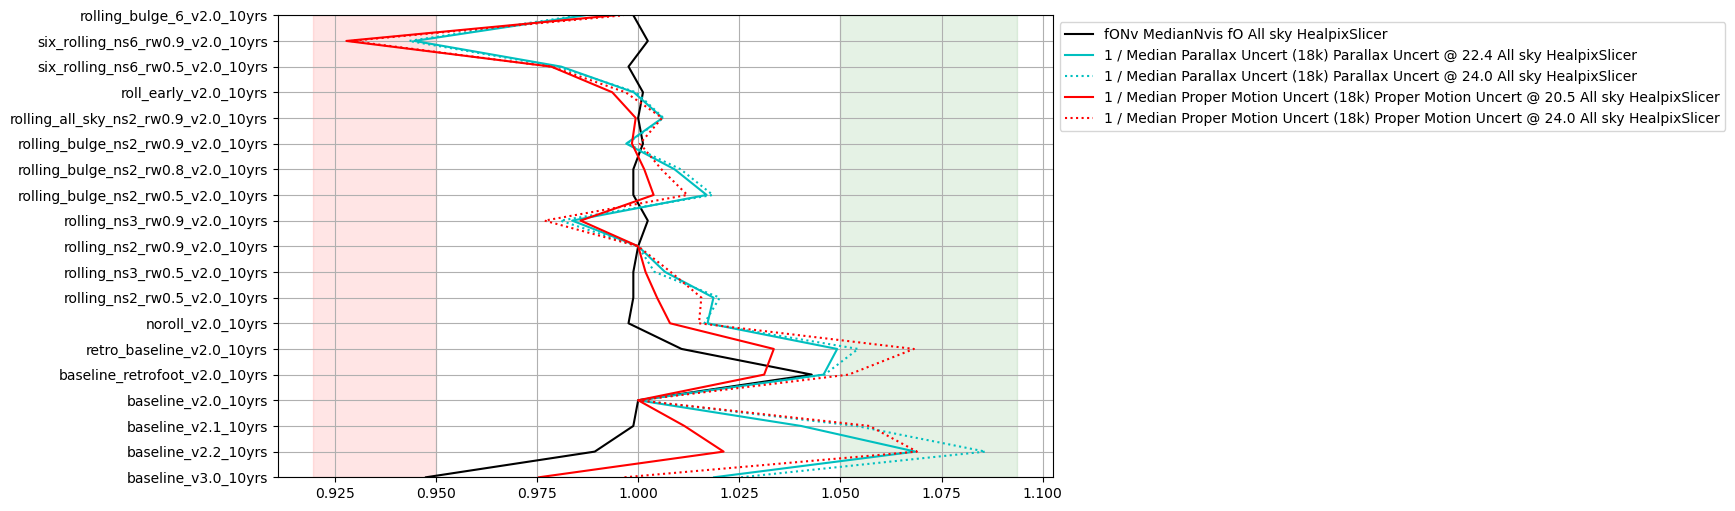

In [23]:
maf.plot_run_metric(
    summary, baseline_run=baseline_run, metric_set=metric_sets.loc[this_metric_set]
)

Passing the metric_set to plot_run_metric adds some default styling for the colors, etc., but also (again) adds the correct normalization. 

The labels on this plot are long and precise, but can be hard to read or show in a small area. Shorter names for both runs and metrics are available in the `pandas.DataFrames` we have already downloaded, and we can build transformations from these `DataFrame`s.

In [24]:
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
metric_label_map

metric
fONv MedianNvis fO All sky HealpixSlicer                                                         fONv MedianNvis
Median Parallax Uncert (18k) Parallax Uncert @ 22.4 All sky HealpixSlicer              Med Parallax Uncert @22.4
Median Parallax Uncert (18k) Parallax Uncert @ 24.0 All sky HealpixSlicer              Med Parallax Uncert @24.0
Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 All sky HealpixSlicer          Med PM Uncert @20.5
Median Proper Motion Uncert (18k) Proper Motion Uncert @ 24.0 All sky HealpixSlicer          Med PM Uncert @24.0
Name: short_name, dtype: object

In [25]:
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
run_label_map

run
baseline_v3.0_10yrs                     V3 baseline simulation. This is the same as dr...
baseline_v2.2_10yrs                                     v2.2 baseline (prescheduled DDFs)
baseline_v2.1_10yrs                                   v2.1 baseline (+Virgo, good seeing)
baseline_v2.0_10yrs                                                         v2.0 baseline
baseline_retrofoot_v2.0_10yrs                    v1.x footprint but new code capabilities
retro_baseline_v2.0_10yrs               v1.x baseline with rubin_sim (without new code...
noroll_v2.0_10yrs                                           v2.0 baseline with no rolling
rolling_ns2_rw0.5_v2.0_10yrs                             Rolling half-sky (2 regions) 50%
rolling_ns3_rw0.5_v2.0_10yrs                            Rolling third-sky (3 regions) 50%
rolling_ns2_rw0.9_v2.0_10yrs                             Rolling half-sky (2 regions) 90%
rolling_ns3_rw0.9_v2.0_10yrs                            Rolling third-sky (3 regions) 90%
rollin

These can be passed to `plot_metric_summary` to replace the labels:
(note that using substitute names can obfuscate the run name, in particular -- was this v1.7 or v2.0, etc -- in ways that make tracking down the contents of plots later difficult)

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

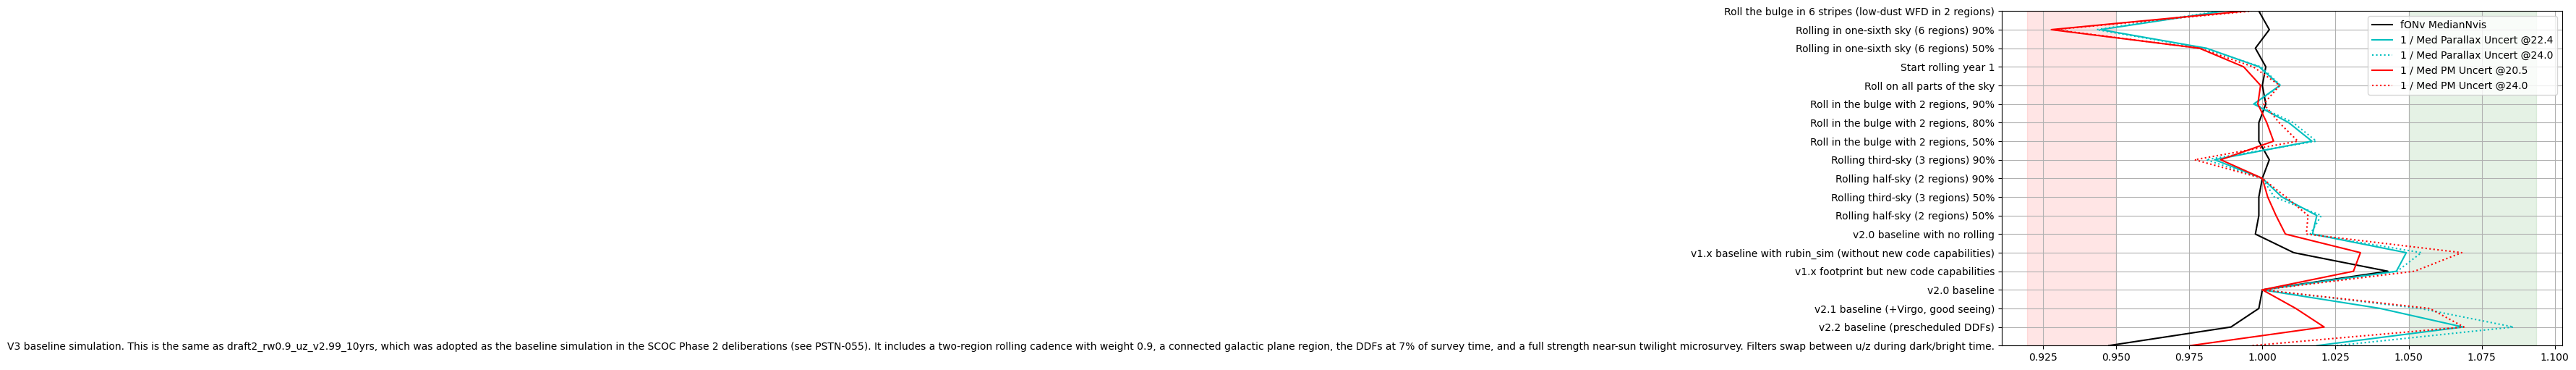

In [26]:
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
    metric_set=metric_sets.loc[this_metric_set],
)

The `vertical_quantity` and `horizontal_quantity` options will let you set which axis (horizontal, vertical, or color) is mapped to which quantity (run, metric name, metric value), and additional arguments set the color maps, markers, and line styles connecting the points:

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

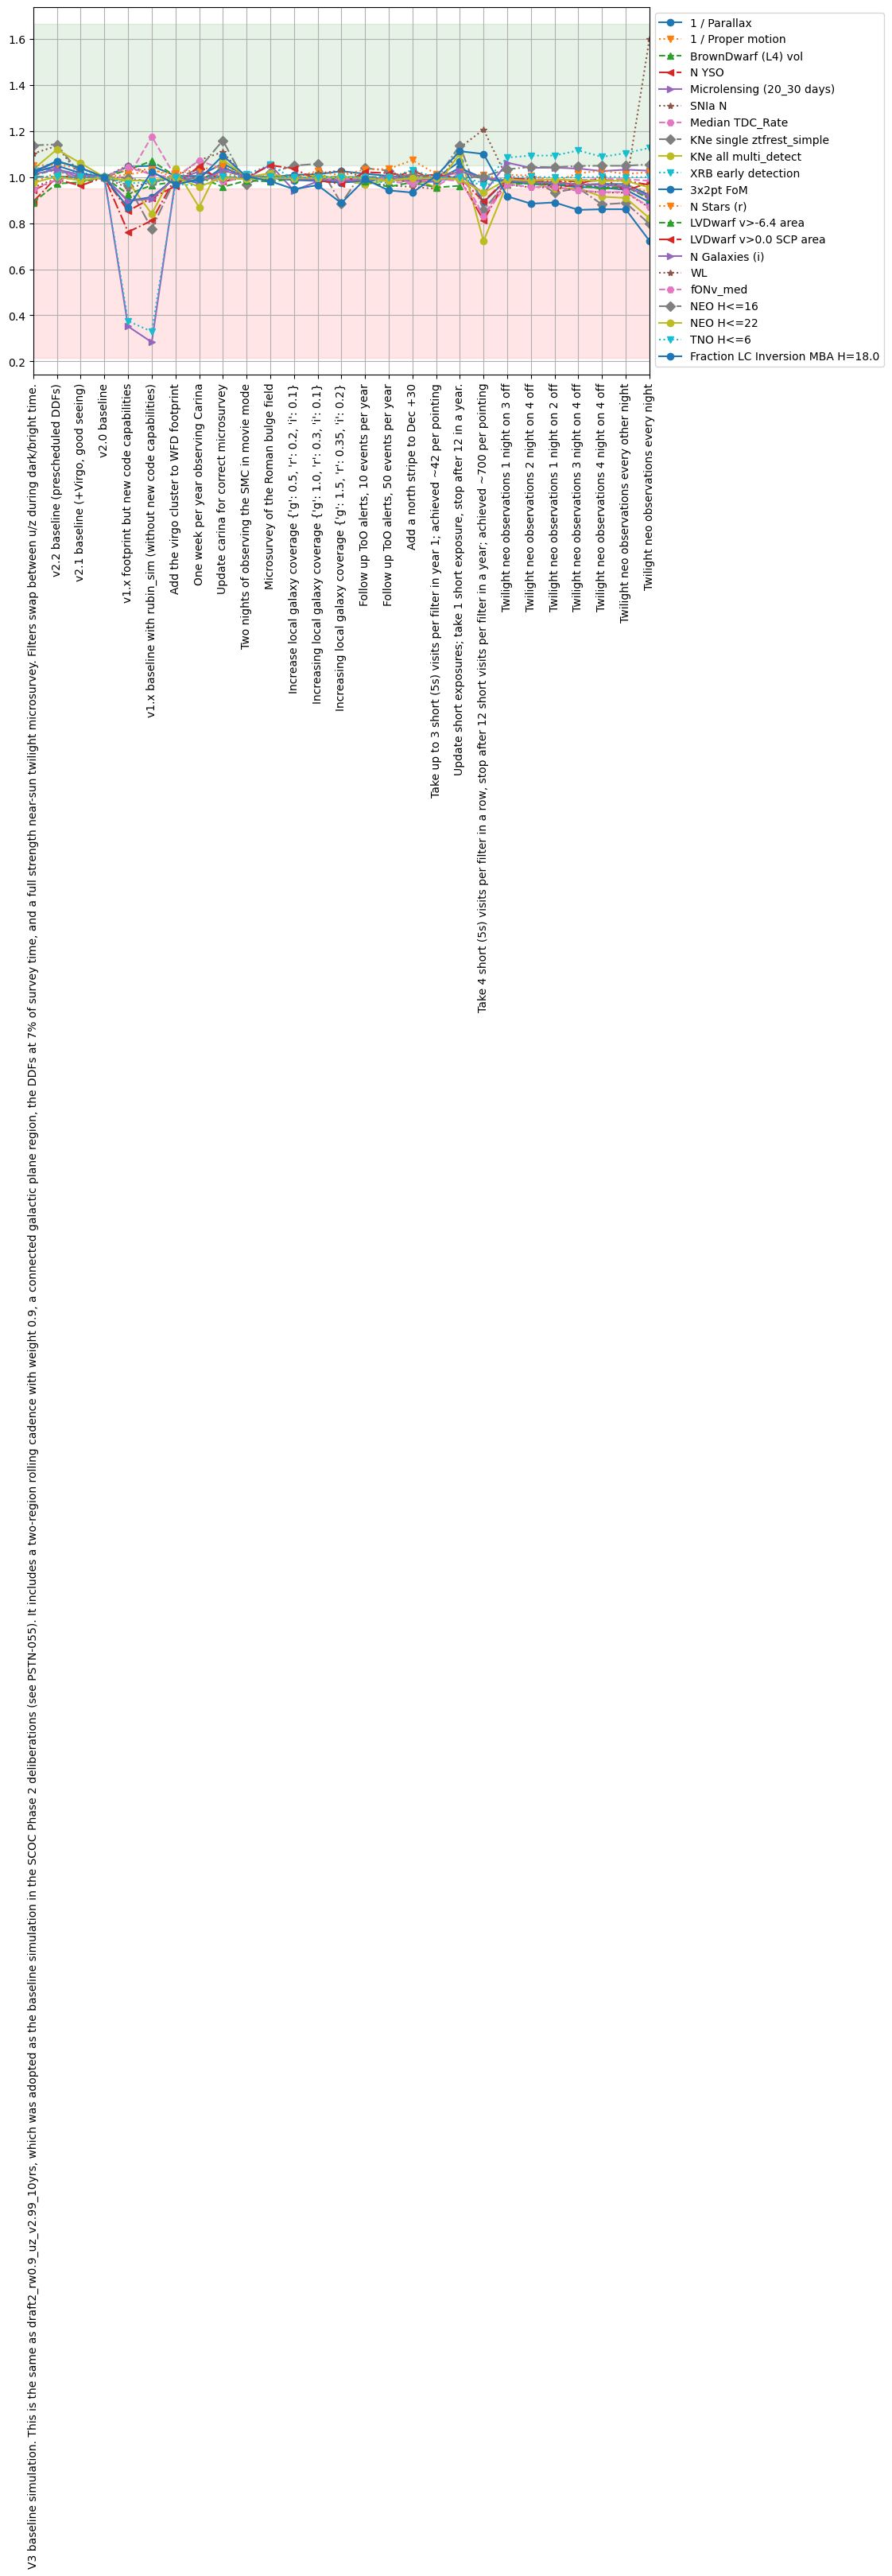

In [27]:
import matplotlib as mpl

this_metric_set = "SCOC"

this_family = ["baseline", "microsurveys"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]

summary = archive.get_metric_summaries(this_family, this_metric_set)
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    metric_set=metric_sets.loc[this_metric_set],
    vertical_quantity="value",
    horizontal_quantity="run",
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
    cmap=mpl.cm.tab10,
    linestyles=["-", ":", "--", "-."],
    markers=["o", "v", "^", "<", ">", "*", "H", "D"],
)

In [28]:
summary

metric,Median Parallax Uncert (18k) Parallax Uncert @ 22.4 HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 HealpixSlicer,"VolumeSum Brown Dwarf, L4 HealpixSlicer",Sum young_stars HealpixSlicer,Total detected MicrolensingMetric_detect tE 20_30 days UserPointsSlicer,Total detected SNNSNMetric_nSN HealpixSlicer,Median TDC_Rate HealpixSlicer,Total detected KNePopMetric_single__ztfrest_simple single model UserPointsSlicer,Total detected KNePopMetric_all__multi_color_detect all models UserPointsSlicer,Total detected XRBPopMetric__early_detect UserPointsSlicer,...,"Total N Stars, crowding N stars to Precision 0.20 r HealpixSlicer",Area M_v>-6.4 LVDwarfs gi HealpixSlicer,Area M_v>0.0 LVDwarfs gi SCP HealpixSlicer,N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,Mean WeakLensingNvisits gri band non-DD HealpixSlicer,fONv MedianNvis fO All sky HealpixSlicer,3 pairs in 15 nights detection loss NEO H<=16.0,3 pairs in 15 nights detection loss NEO H<=22.0,3 pairs in 15 nights detection loss TNO H<=6.0,FractionPop Lightcurve Inversion MBA H=18.0
run,,,,,,,,,,,,,,,,,,,,,
baseline_v3.0_10yrs,2.378434,0.195380,584346.055587,7.216222e+06,3239.0,109475.798536,22.406077,528.0,2004.0,1950.0,...,2.740471e+09,12528.975536,1467.085292,4.625109e+09,422.539291,795.0,0.9324,0.561118,0.696296,0.152831
baseline_v2.2_10yrs,2.267676,0.186646,599887.062691,8.094331e+06,3212.0,112802.099640,22.370474,530.0,2171.0,1921.0,...,2.752029e+09,13680.486417,1537.585958,4.724618e+09,439.590174,830.0,0.9302,0.576552,0.697909,0.159632
baseline_v2.1_10yrs,2.329280,0.188435,569623.807778,8.101241e+06,3111.0,99283.467889,21.249388,469.0,2055.0,1919.0,...,2.710372e+09,13754.344258,1497.299863,4.611300e+09,443.096621,838.0,0.9284,0.566460,0.696756,0.155031
baseline_v2.0_10yrs,2.423048,0.190588,579945.237222,8.080644e+06,3116.0,99313.310364,21.566539,464.0,1938.0,1879.0,...,2.610228e+09,14073.275843,1554.371831,4.568638e+09,442.290894,839.0,0.9296,0.575235,0.695976,0.149230
baseline_retrofoot_v2.0_10yrs,2.316875,0.184832,598147.720016,6.156854e+06,1097.0,94561.090749,21.561416,448.0,1901.0,705.0,...,2.640138e+09,13032.551723,1326.083959,4.094741e+09,465.149966,875.0,0.9260,0.566718,0.676619,0.129426
retro_baseline_v2.0_10yrs,2.309433,0.184406,620704.908816,6.557409e+06,883.0,97144.661100,25.368817,360.0,1629.0,619.0,...,2.684094e+09,13576.414005,1413.370499,4.138227e+09,447.246373,848.0,0.9094,0.567183,0.682227,0.152831
virgo_cluster_v2.0_10yrs,2.409472,0.191103,582612.402533,8.067317e+06,3075.0,98748.938138,21.579094,461.0,2009.0,1822.0,...,2.651850e+09,13794.630353,1493.942688,4.561217e+09,440.272069,836.0,0.9288,0.574944,0.696096,0.144429
carina_v2.0_10yrs,2.411919,0.191445,574785.767621,8.060339e+06,3194.0,106589.204864,23.109728,481.0,1684.0,1810.0,...,2.698784e+09,14090.061716,1628.229672,4.475945e+09,440.597910,838.0,0.9220,0.550987,0.693073,0.147830
carina_v2.2_10yrs,2.287063,0.187352,596226.912358,8.077371e+06,3114.0,110201.063319,22.341183,538.0,2083.0,1856.0,...,2.733148e+09,13472.341593,1524.157260,4.702023e+09,436.082168,824.0,0.9284,0.574409,0.698562,0.163233


## 9 Mesh plots

Alternately, you can color code the metric value itself using `plot_run_metric_mesh`:

(<Figure size 600x600 with 2 Axes>, <Axes: >)

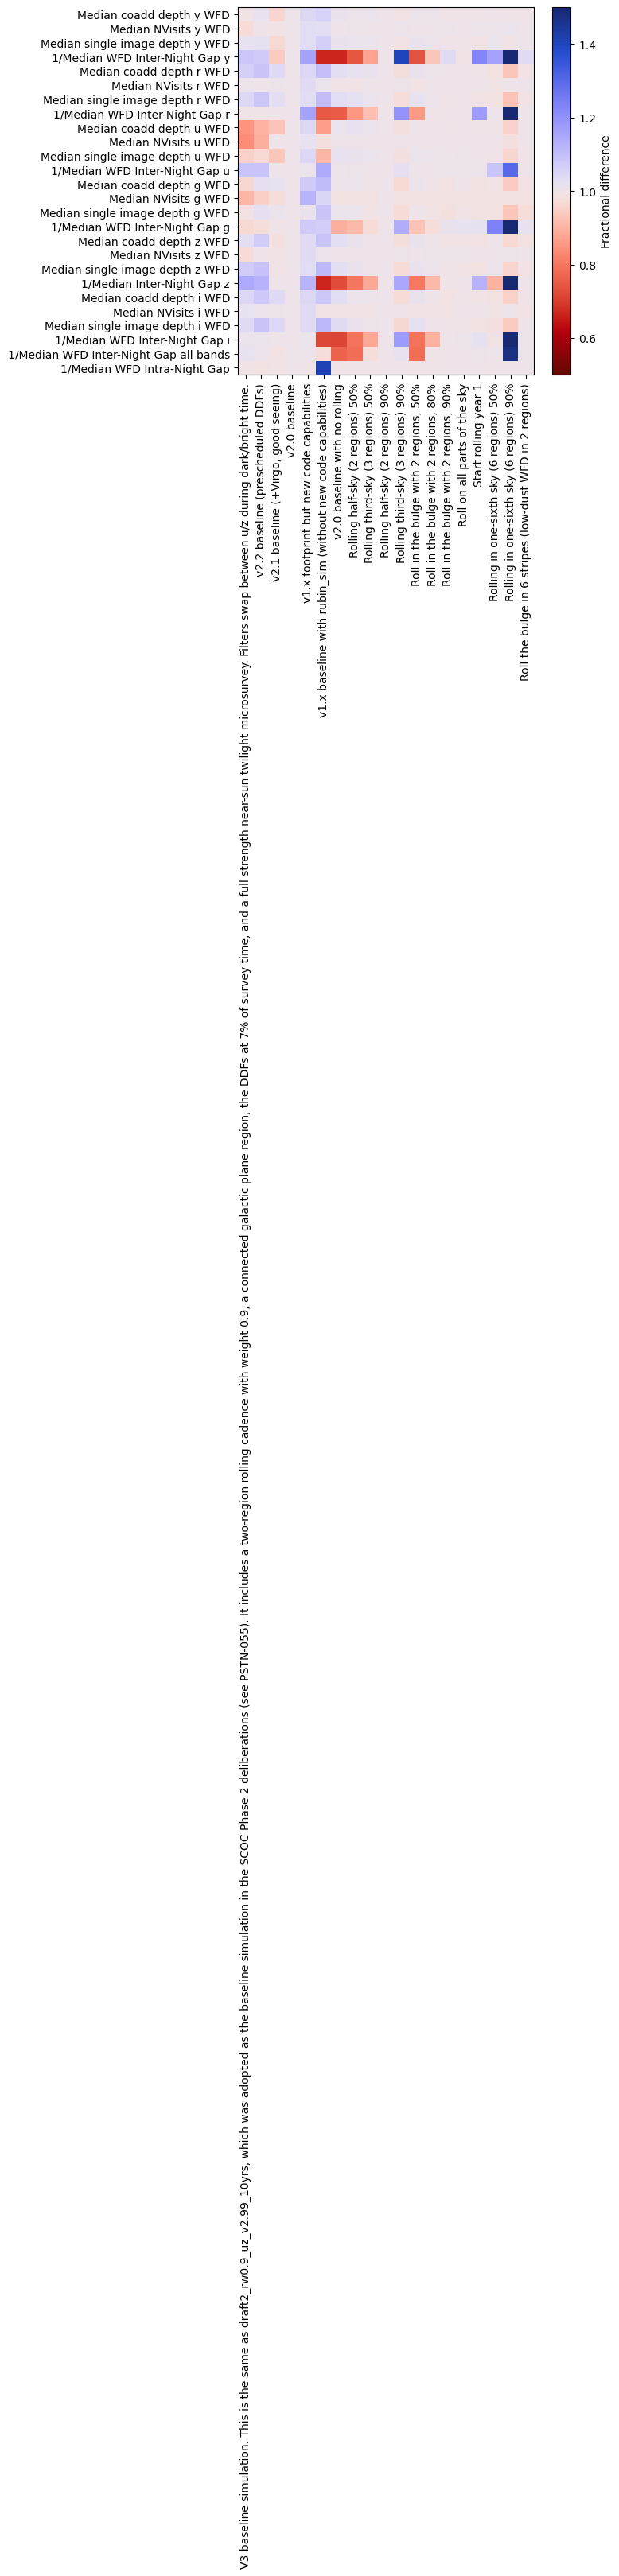

In [29]:
this_metric_set = ["WFD Depths", "cadence"]
metric_label_map = metric_sets.loc[this_metric_set, "short_name"].droplevel(
    "metric set"
)

this_family = ["baseline", "rolling"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]

summary = maf.get_metric_summaries(this_family, this_metric_set)

maf.plot_run_metric_mesh(
    summary,
    baseline_run=baseline_run,
    metric_set=metric_sets.loc[this_metric_set],
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
)

## 10 Radar plots

Finally, if the numbers of runs and metrics are manageable, you can compare different metrics of different runs with a radar plot.

Let's select a modest collection of metrics and family of runs, and build a summary:

In [30]:
family_runs.loc[["baseline", "technical"], :]

,run,description,version,reference,brief,url,filepath
family,,,,,,,
baseline,baseline_v3.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,V3 baseline simulation. This is the same as dr...,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_3.0/baseline/baseline_v3.0_10yrs.db
baseline,baseline_v2.2_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v2.2 baseline (prescheduled DDFs),https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.2/baseline/baseline_v2.2_10yrs.db
baseline,baseline_v2.1_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline,baseline_v2.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v2.0 baseline,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline,baseline_retrofoot_v2.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v1.x footprint but new code capabilities,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
baseline,retro_baseline_v2.0_10yrs,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,v1.x baseline with rubin_sim (without new code...,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.0/retro/retro_baseline_v2.0_10yrs.db
technical,march_start_v2.1_10yrs,**technical** : This family is primarily aimed...,2.1,baseline_v2.1_10yrs,Start the survey in March 2022,https://s3df.slac.stanford.edu/data/rubin/sim-...,fbs_2.1/technical/march_start/march_start_v2.1...


In [31]:
this_metric_set = "radar"
this_family = ["baseline", "technical"]
summary = maf.get_metric_summaries(this_family, this_metric_set)

The radar plot function requires that the data already be normalized, so normalize it:

In [32]:
norm_summary = maf.normalize_metric_summaries(
    baseline_run, summary, metric_sets=metric_sets.loc[this_metric_set]
)

The radar plot function takes the run and metric names from the `DataFrame` row and column names, so we can use short name by renaming the rows and columns:

In [33]:
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
norm_summary.rename(columns=run_label_map, index=metric_label_map, inplace=True)

Make the radar plot:

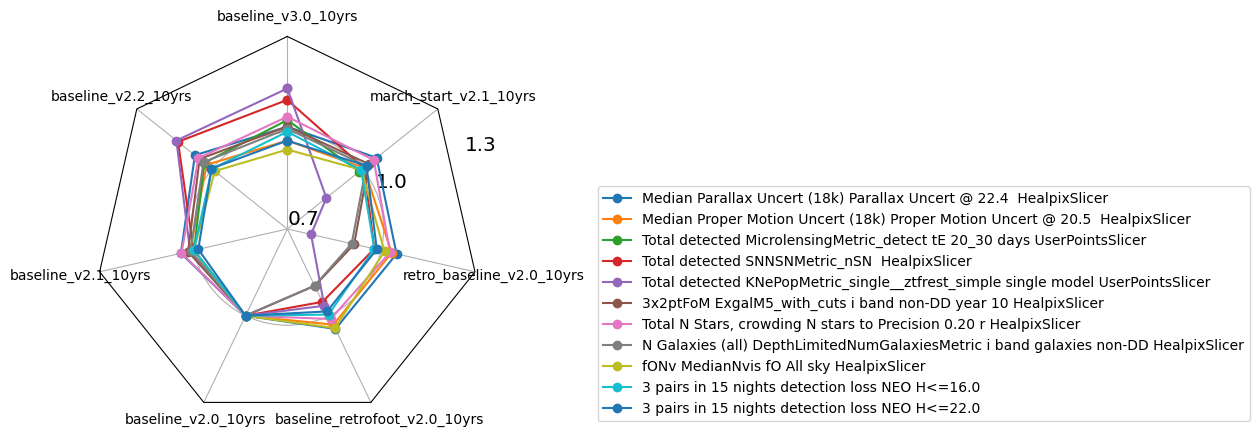

In [34]:
fig, ax = maf.radar(norm_summary.T, bbox_to_anchor=(3, 0), rgrids=[0.7, 1.0, 1.3])


## 11 Plotting yet more metrics and runs

Multiple sets of metrics and families of runs can be retrieved and plotted at once, and these can be supplemented by additional individual runs and metrics:

In [35]:
these_metric_sets = ["SRD", "WFD Depths", "radar"]
these_families = ["baseline", "triplets", "long gaps no pairs"]
extra_runs = [
    "noroll_v2.0_10yrs",
]
extra_metrics = [
    "Median Median Intra-Night Gap WFD HealpixSubsetSlicer",
]
summary = maf.get_metric_summaries(
    these_families, these_metric_sets, runs=extra_runs, metrics=extra_metrics
)

Because the slicing in pandas will return a multilevel index when multiple runs or families are sliced on, a little additional processing is needed to get a mapping from run or index name alone:

In [36]:
mset = metric_sets.loc[these_metric_sets].reset_index(
    "metric set", drop=True, allow_duplicates=False
)

In [37]:
these_runs = list(summary.index)
run_label_map = (
    family_runs[["run", "brief"]]
    .set_index("run")
    .loc[these_runs, "brief"]
    .groupby("run")
    .first()
)

In [38]:
these_metrics = list(summary.columns)
metric_label_map = (
    metric_sets.loc[(slice(None), these_metrics), "short_name"]
    .groupby("metric")
    .first()
)

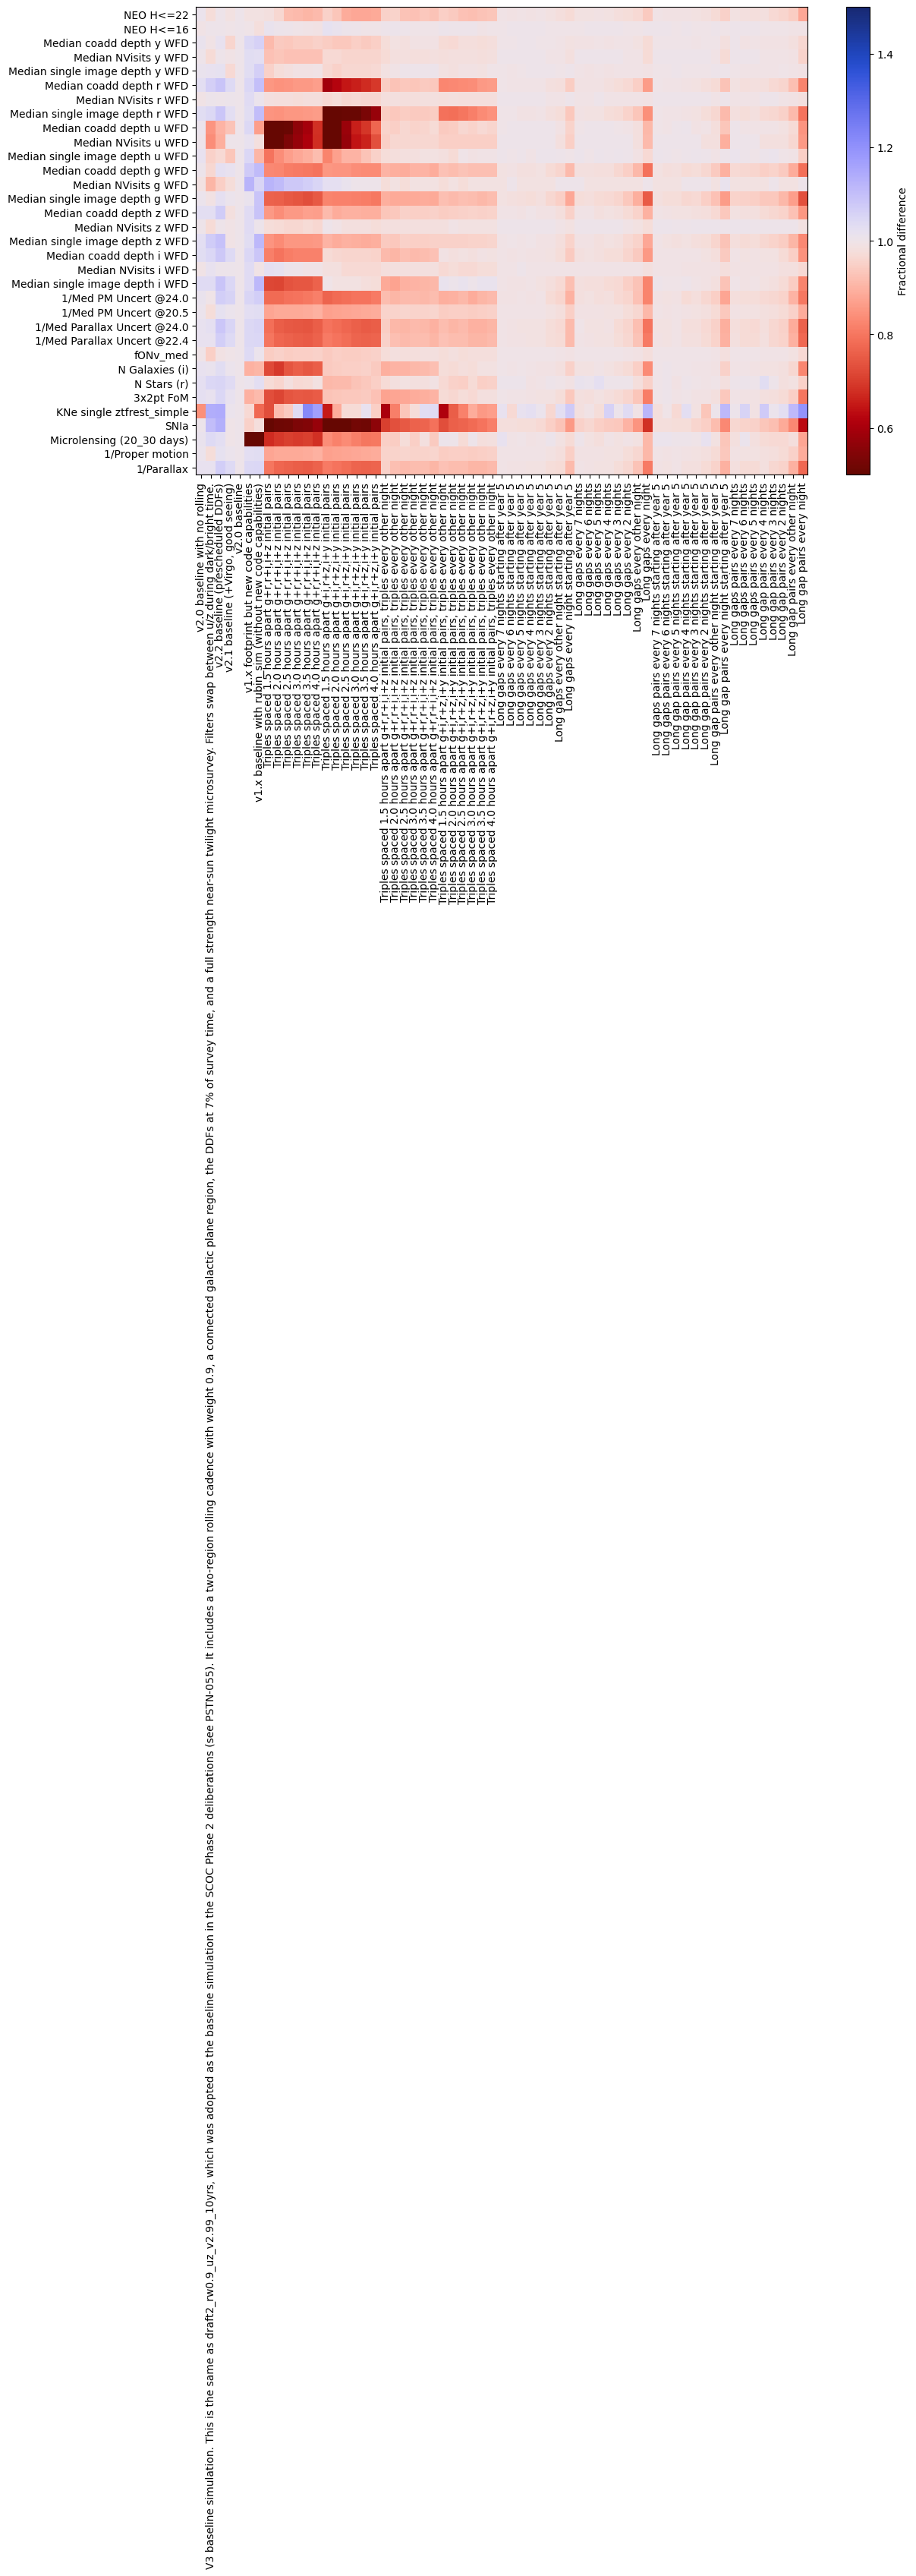

In [39]:
fig, ax = maf.plot_run_metric_mesh(
    summary,
    baseline_run=baseline_run,
    metric_set=mset,
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
)
fig.set_figwidth(13)
fig.set_figheight(8)

## 12 Plotting other metrics

Not all metrics present in the summary table have corresponding columns in the `metrics_set` data. 
If they do not, the MAF code does not know how to normalize these values (do they correspond to magnitudes? should they be inverted so that "bigger values are better" in the normalized plots?) and it's harder to deal with them.
For example, minimum WFD depth values have no normalization values:

In [41]:
min_depth_metrics = tuple(
    f"Min CoaddM5 WFD {b} band HealpixSubsetSlicer" for b in "ugrizy"
)
min_depth_metrics

('Min CoaddM5 WFD u band HealpixSubsetSlicer',
 'Min CoaddM5 WFD g band HealpixSubsetSlicer',
 'Min CoaddM5 WFD r band HealpixSubsetSlicer',
 'Min CoaddM5 WFD i band HealpixSubsetSlicer',
 'Min CoaddM5 WFD z band HealpixSubsetSlicer',
 'Min CoaddM5 WFD y band HealpixSubsetSlicer')

We can still load the un-normalied metric values:

In [42]:
summary = maf.get_metric_summaries(
    summary_source=summaries,
    run_families=["baseline", "bluer balance"],
    metrics=min_depth_metrics,
    metric_order="set",
)
summary

metric,Min CoaddM5 WFD u band HealpixSubsetSlicer,Min CoaddM5 WFD g band HealpixSubsetSlicer,Min CoaddM5 WFD r band HealpixSubsetSlicer,Min CoaddM5 WFD i band HealpixSubsetSlicer,Min CoaddM5 WFD z band HealpixSubsetSlicer,Min CoaddM5 WFD y band HealpixSubsetSlicer
run,,,,,,
baseline_v3.0_10yrs,24.968423,26.213252,26.441353,25.880698,25.139840,24.188441
baseline_v2.2_10yrs,25.025027,26.299751,26.485085,25.911618,25.198504,23.905143
baseline_v2.1_10yrs,25.093610,26.264803,26.411837,25.791297,25.071446,23.686803
baseline_v2.0_10yrs,25.196428,26.401892,26.438384,25.801749,25.120156,23.739837
baseline_retrofoot_v2.0_10yrs,25.523643,26.453339,26.597617,26.076968,25.324978,24.541196
retro_baseline_v2.0_10yrs,25.314226,26.548470,26.623485,26.045043,25.358114,24.537959
bluer_indx0_v2.0_10yrs,25.118566,26.502501,26.452352,25.805180,25.137013,23.657836
bluer_indx1_v2.0_10yrs,25.178282,26.452867,26.408266,25.804820,25.071340,23.770425


(21.0, 28.0)

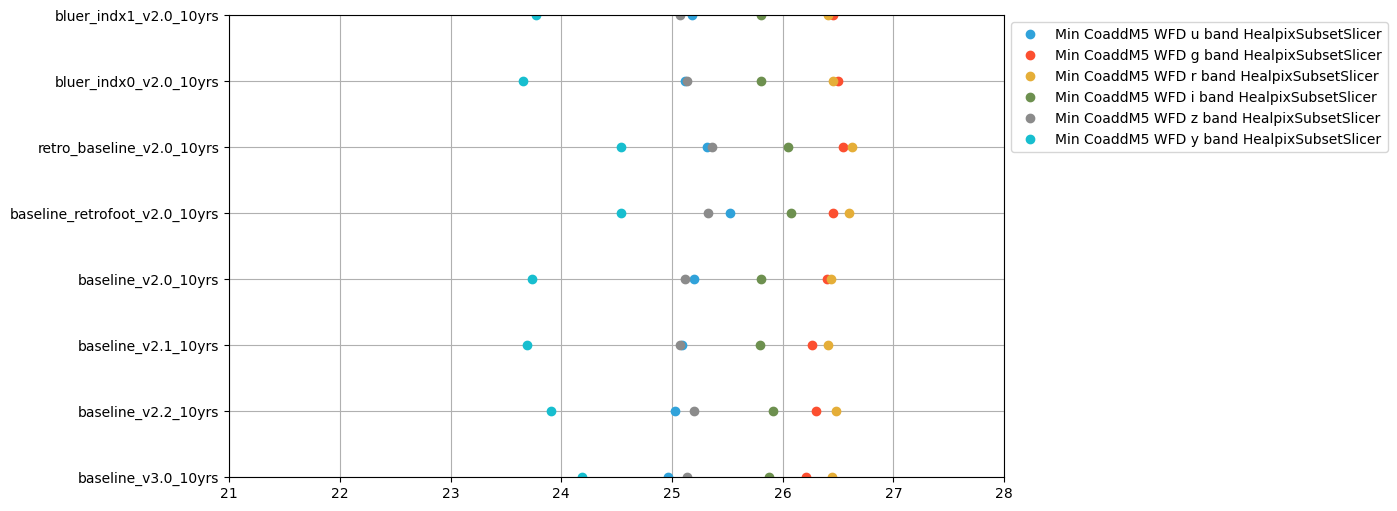

In [43]:
fig, ax = maf.plot_run_metric(summary, shade_fraction=None)
ax.set_xlim(21, 28)

If you want to properly normalize them, you can create you own metric_sets `DataFrame`:

In [44]:
mset = maf.create_metric_set_df(
    metric_set="min depth wfd",
    metrics=min_depth_metrics,
    short_name=[f"Min {b} band depth WFD" for b in "ugrizy"],
    style=["c-", "g-", "y-", "r-", "m-", "k-"],
    mag=True,
)
mset

metric  \
metric set    metric                                                                                   
min depth wfd Min CoaddM5 WFD u band HealpixSubsetSlicer  Min CoaddM5 WFD u band HealpixSubsetSlicer   
              Min CoaddM5 WFD g band HealpixSubsetSlicer  Min CoaddM5 WFD g band HealpixSubsetSlicer   
              Min CoaddM5 WFD r band HealpixSubsetSlicer  Min CoaddM5 WFD r band HealpixSubsetSlicer   
              Min CoaddM5 WFD i band HealpixSubsetSlicer  Min CoaddM5 WFD i band HealpixSubsetSlicer   
              Min CoaddM5 WFD z band HealpixSubsetSlicer  Min CoaddM5 WFD z band HealpixSubsetSlicer   
              Min CoaddM5 WFD y band HealpixSubsetSlicer  Min CoaddM5 WFD y band HealpixSubsetSlicer   

                                                                    short_name  \
metric set    metric                                                             
min depth wfd Min CoaddM5 WFD u band HealpixSubsetSlicer  Min u band depth WFD   
              Min CoaddM5 WFD g band HealpixSubsetSlicer  Min g band depth WFD   
              Min CoaddM5 WFD r band HealpixSubsetSlicer  Min r band depth WFD   
              Min CoaddM5 WFD i band HealpixSubsetSlicer  Min i band depth WFD   
              Min CoaddM5 WFD z band HealpixSubsetSlicer  Min z band depth WFD   
              Min CoaddM5 WFD y band HealpixSubsetSlicer  Min y band depth WFD   

                                                         style  invert   mag  
metric set    metric                                                          
min depth wfd Min CoaddM5 WFD u band HealpixSubsetSlicer    c-   False  True  
              Min CoaddM5 WFD g band HealpixSubsetSlicer    g-   False  True  
              Min CoaddM5 WFD r band HealpixSubsetSlicer    y-   False  True  
              Min CoaddM5 WFD i band HealpixSubsetSlicer    r-   False  True  
              Min CoaddM5 WFD z band HealpixSubsetSlicer    m-   False  True  
              Min CoaddM5 WFD y band HealpixSubsetSlicer    k-   False  True

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

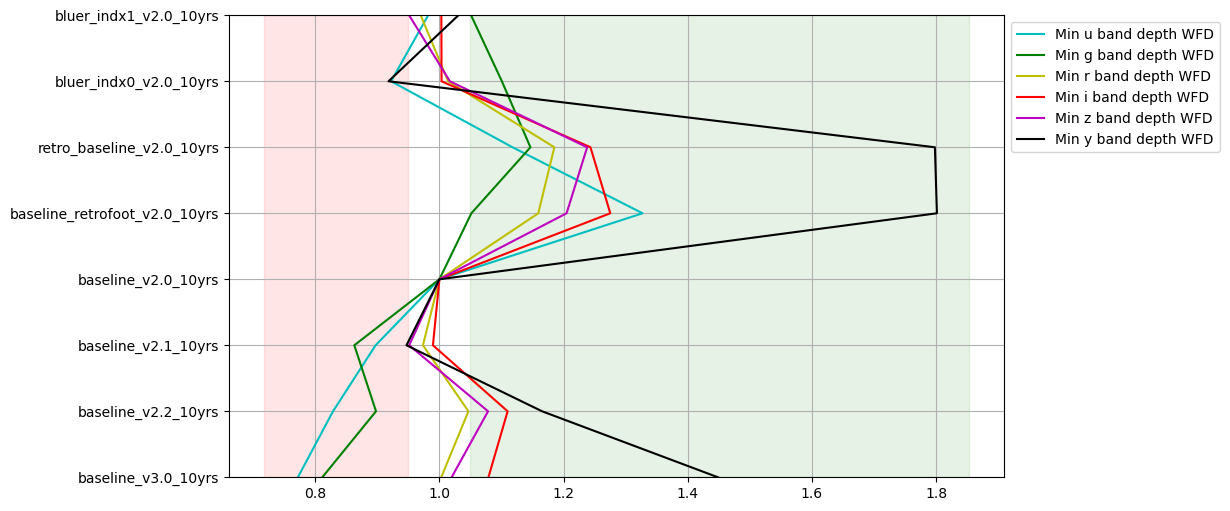

In [45]:
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    metric_label_map=mset.loc["min depth wfd"]["short_name"],
    metric_set=mset.loc["min depth wfd"],
)

## 13 Running additional MAF metrics

If the summary metrics are inadequate for what you need, you can download the opsim databases using URLs found in the `runs` `DataFrame` we downloaded above (using `get_runs`):

In [46]:
runs

,family,version,brief,filepath,url
run,,,,,
baseline_retrofoot_v2.0_10yrs,[baseline],[--],v1.x footprint but new code capabilities,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
baseline_v2.0_10yrs,[baseline],[--],v2.0 baseline,fbs_2.0/baseline/baseline_v2.0_10yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
baseline_v2.1_10yrs,[baseline],[--],"v2.1 baseline (+Virgo, good seeing)",fbs_2.1/baseline/baseline_v2.1_10yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
baseline_v2.2_10yrs,[baseline],[--],v2.2 baseline (prescheduled DDFs),fbs_2.2/baseline/baseline_v2.2_10yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
baseline_v2.2_2yrs,[ToO],[2.2],v2.2 baseline first two years only,fbs_2.2/baseline/baseline_v2.2_2yrs.db,https://s3df.slac.stanford.edu/data/rubin/sim-...
...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,[vary nes],[2.0],NES at 50% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.50_v2.0_10y...,https://s3df.slac.stanford.edu/data/rubin/sim-...
vary_nes_nesfrac0.55_v2.0_10yrs,[vary nes],[2.0],NES at 55% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.55_v2.0_10y...,https://s3df.slac.stanford.edu/data/rubin/sim-...
vary_nes_nesfrac0.75_v2.0_10yrs,[vary nes],[2.0],NES at 75% WFD level,fbs_2.0/vary_nes/vary_nes_nesfrac0.75_v2.0_10y...,https://s3df.slac.stanford.edu/data/rubin/sim-...


## 14 Putting it all together to explore a set of simulations

When exploring a new set of simulations (e.g. version 2.0), it can be useful to load the relevant family, run, and metric set `DataFrame`s, and define a single shorthand function to give everything you want on specific families.

For example, for the v2.0 runs, we let's get the relevant `DataFrames` and define such a function:

In [59]:
url_base = "https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/"
families = maf.get_family_descriptions(url_base + "runs_v2.2.json")
summary = maf.get_metric_summaries(summary_source=url_base + "summary_2022_11_16.csv")
metric_sets = maf.get_metric_sets(url_base + "metric_sets.json")

Grab a common baseline, using the baseline family:

In [60]:
baseline_run = families.loc["baseline", "run"][0]
baseline_run

'baseline_v3.0_10yrs'

Make a mesh that shows all runs, and all metrics that are members of at least one metric set:

KeyError: 'baseline_v3.0_10yrs'

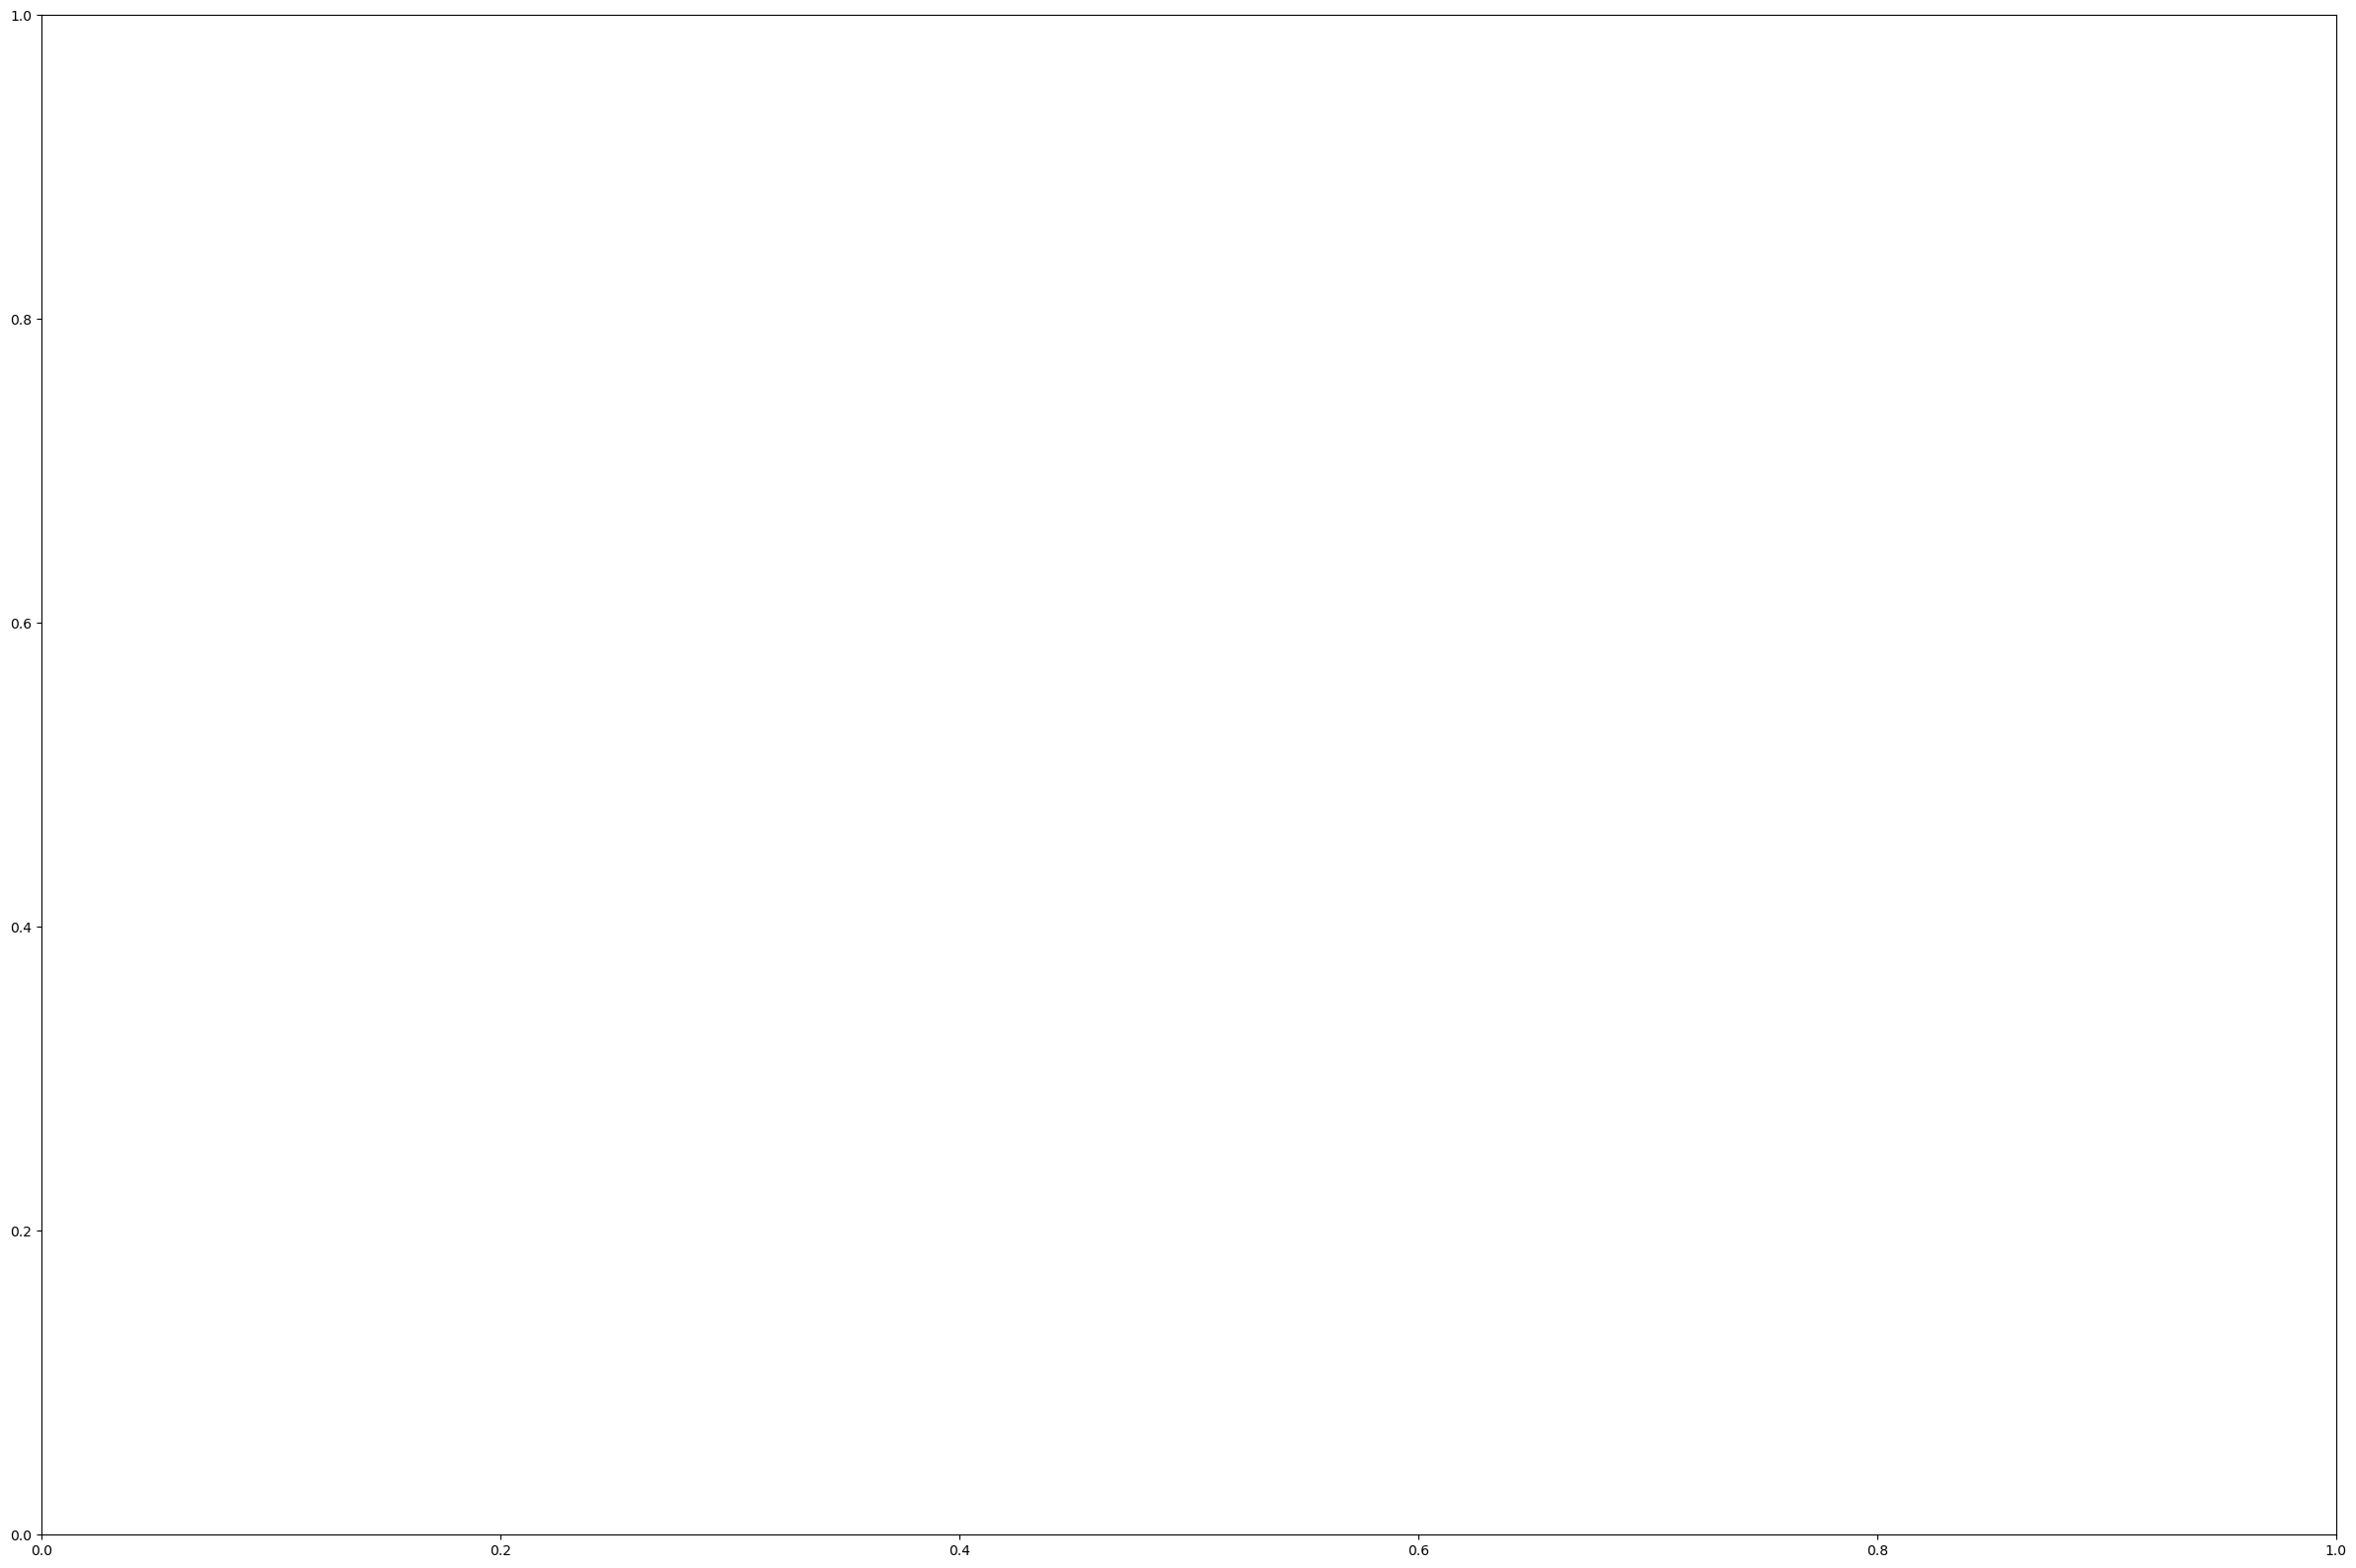

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Include metrics from all metric sets (use the metric set so that we can invert appropriately)
# skip DD specific metrics
non_dd = [
    ms for ms in list(metric_sets.groupby("metric set").first().index) if not "DD" in ms
]
mset = (
    metric_sets.loc[non_dd]
    .reset_index(drop=True)
    .drop("style", axis=1)
    .drop("short_name", axis=1)
)
mset = mset.drop_duplicates().set_index("metric", drop=False, verify_integrity=True)

# Adjust the plot size so everything will fit without the labels overlapping
# Requires fiddling by hand.
fig, ax = plt.subplots(figsize=(30, 20))
maf.plot_run_metric_mesh(
    summary.loc[:, mset["metric"]],
    baseline_run=baseline_run,
    metric_set=mset,
    ax=ax,
)
fig.set_figheight(40)
fig.set_figwidth(15)